# Technical Assessment - Analyst, Data Science

A Supervision Manager has asked you to help in allocating scarce resources, and identify which firms their team should focus on. Supervisory resource may be allocated according to the following characteristics: 
* Firm size (i.e. the biggest firms need more attention) 
* Changing business profile (are firms’ data changing substantially year-on-year?) 
* Outliers from the norm (when looking at a single reporting period, does a firm deviate significantly from the average?) 

Some typical metrics have been provided in the attached data sheets. These include: 
* Gross Written Premium (GWP) – total revenue written by an insurer. Equivalent of turnover for a non-insurance firm. 
* Net Written Premium (NWP) – GWP less reinsurance. NWP / GWP will show how much of the firm’s risk is being passed on to reinsurers. 
* SCR coverage ratio – a measure of whether a firm is meeting its prudential capital requirements. Greater than 100% means the firm is holding enough capital to meet the requirement. The size of the buffer (i.e. surplus over 100%) can be important. 
* Gross claims incurred – a large cost to an insurer. Monitoring how these change over time for a firm is vital. 
* Net combined ratio – (incurred losses plus expenses) / earned premiums. This is a ratio that can indicate the profitability of a firm. If this is less than 100% it indicates a profit. 

### Task 1

Using the data provided, please analyse this data using a programming language of your choosing and produce a short report, including tables and charts, to highlight which firms should receive the most attention, according to the metrics above. 

### Task 2

Please consider using relevant ML techniques to draw out further insights and present them as an annex to your report.

## 1. Read data

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir("../")

In [2]:
general_data = pd.read_excel('technical-assessment-data.xlsx', sheet_name = 'Dataset 1 - General')
underwriting_data = pd.read_excel('technical-assessment-data.xlsx', sheet_name = 'Dataset 2 - Underwriting')

## 2. Clean and wrangle

In [3]:
# Refine variables
general_data = general_data[['Unnamed: 0',
 'NWP (£m) ', 'NWP (£m) .1', 'NWP (£m) .2', 'NWP (£m) .3', 'NWP (£m) .4',
 'GWP (£m)', 'GWP (£m).1', 'GWP (£m).2', 'GWP (£m).3', 'GWP (£m).4',
 'SCR coverage ratio', 'SCR coverage ratio.1', 'SCR coverage ratio.2', 'SCR coverage ratio.3', 'SCR coverage ratio.4'
]]
underwriting_data = underwriting_data[['Unnamed: 0',
 'Gross claims incurred (£m)', 'Gross claims incurred (£m).1', 'Gross claims incurred (£m).2', 'Gross claims incurred (£m).3', 'Gross claims incurred (£m).4',
 'Net combined ratio', 'Net combined ratio.1', 'Net combined ratio.2', 'Net combined ratio.3', 'Net combined ratio.4'
]]

# Convert df from wide to long
general_rename_dict = {'Unnamed: 0': 'firm',
 'NWP (£m) ' : 'net-written-premium2016',
 'NWP (£m) .1' : 'net-written-premium2017',
 'NWP (£m) .2' : 'net-written-premium2018',
 'NWP (£m) .3' : 'net-written-premium2019',
 'NWP (£m) .4' : 'net-written-premium2020',
 'SCR coverage ratio' : 'scr-coverage-ratio2016',
 'SCR coverage ratio.1' : 'scr-coverage-ratio2017',
 'SCR coverage ratio.2' : 'scr-coverage-ratio2018',
 'SCR coverage ratio.3' : 'scr-coverage-ratio2019',
 'SCR coverage ratio.4' : 'scr-coverage-ratio2020',
 'GWP (£m)' : 'gross-written-premium2016',
 'GWP (£m).1' : 'gross-written-premium2017',
 'GWP (£m).2' : 'gross-written-premium2018',
 'GWP (£m).3' : 'gross-written-premium2019',
 'GWP (£m).4' : 'gross-written-premium2020'
}
general_data.rename(columns = general_rename_dict, inplace = True)
general_data.drop([0], inplace = True)
general_data = pd.wide_to_long(general_data, ['net-written-premium','scr-coverage-ratio', 'gross-written-premium'], i = 'firm', j = 'year')
general_data = general_data.reset_index(level=['firm', 'year'])

underwriting_rename_dict = {'Unnamed: 0' : 'firm',
 'Gross claims incurred (£m)' : 'gross-claims-incurred2016',
 'Gross claims incurred (£m).1' : 'gross-claims-incurred2017',
 'Gross claims incurred (£m).2' : 'gross-claims-incurred2018',
 'Gross claims incurred (£m).3' : 'gross-claims-incurred2019',
 'Gross claims incurred (£m).4' : 'gross-claims-incurred2020',
 'Net combined ratio' : 'net-combined-ratio2016',
 'Net combined ratio.1' : 'net-combined-ratio2017',
 'Net combined ratio.2' : 'net-combined-ratio2018',
 'Net combined ratio.3' : 'net-combined-ratio2019',
 'Net combined ratio.4' : 'net-combined-ratio2020'
}
underwriting_data.rename(columns = underwriting_rename_dict, inplace = True)
underwriting_data.drop([0], inplace = True)
underwriting_data = pd.wide_to_long(underwriting_data, ['gross-claims-incurred', 'net-combined-ratio'], i = 'firm', j = 'year')
underwriting_data = underwriting_data.reset_index(level=['firm', 'year'])

# Outer join into a single df
firm_data = pd.merge(general_data, underwriting_data, on = ['firm', 'year'], how = 'outer')

## 3. Analysis

### 3.1. Firm size

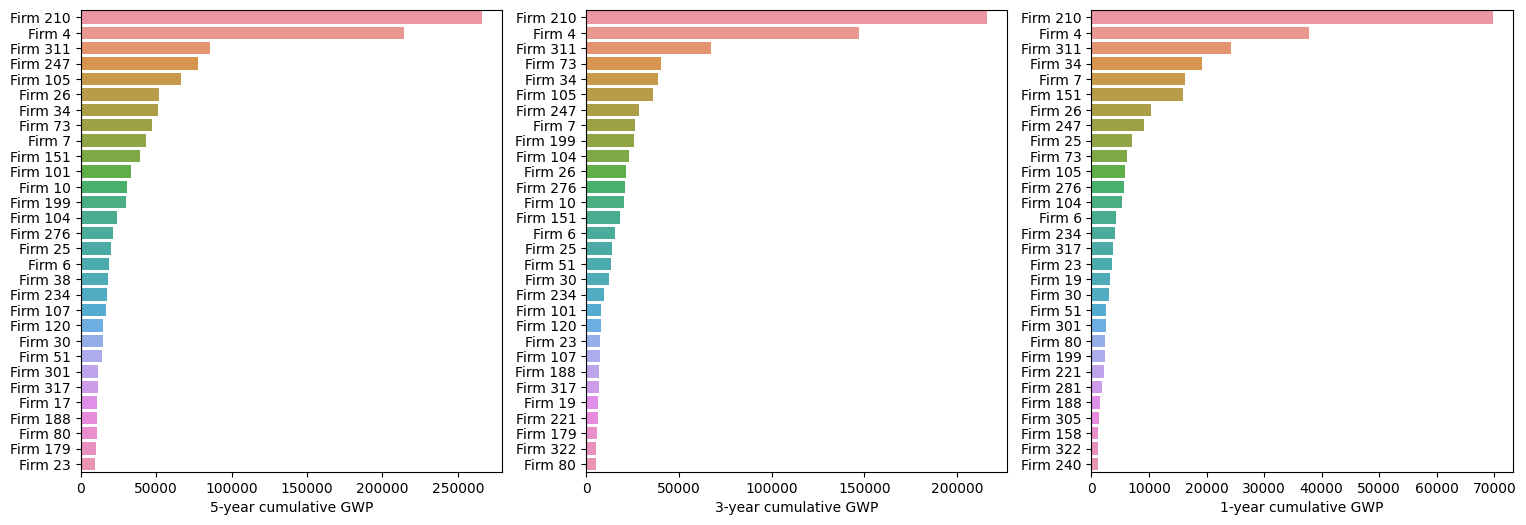

In [26]:
# Identify firms with the top cumulative gwp over 5 year period
five_year_cumulative_gwp = firm_data.groupby('firm').agg({'gross-written-premium' : 'sum'}).sort_values(['gross-written-premium'], ascending = False).head(30)
five_year_cumulative_gwp = five_year_cumulative_gwp.reset_index(level='firm')

# Identify firms with the top cumulative gwp over 3 year period
three_year_cumulative_gwp = firm_data[firm_data["year"] > 2017].groupby('firm').agg({'gross-written-premium' : 'sum'}).sort_values(['gross-written-premium'], ascending = False).head(30)
three_year_cumulative_gwp = three_year_cumulative_gwp.reset_index(level='firm')

# Identify firms with the top cumulative gwp over 1 year period
one_year_cumulative_gwp = firm_data[firm_data["year"] > 2019].groupby('firm').agg({'gross-written-premium' : 'sum'}).sort_values(['gross-written-premium'], ascending = False).head(30)
one_year_cumulative_gwp = one_year_cumulative_gwp.reset_index(level='firm')

# Plot of GWP
plt.figure(figsize=(25,6))
plt.subplot(141)
fig1 = sns.barplot(data=five_year_cumulative_gwp,x='gross-written-premium', y='firm')
fig1.set_xlabel('5-year cumulative GWP')
fig1.set_ylabel('')
plt.subplot(142)
fig2 = sns.barplot(data=three_year_cumulative_gwp,x='gross-written-premium', y='firm')
fig2.set_xlabel('3-year cumulative GWP')
fig2.set_ylabel('')
plt.subplot(143)
fig3 = sns.barplot(data=one_year_cumulative_gwp,x='gross-written-premium', y='firm')
fig3.set_xlabel('1-year cumulative GWP')
fig3.set_ylabel('')
plt.show()

### 3.2. Changing business profile

### 3.3. Outliers

#### 3.3.1 SRC-Coverage-Ratio 

A boxplot used to see whether any clear outlier variables for SCR coverage ratio. These values are extracted as a list. Firm 127 appears to have reported erroneous data for all years between 2017-2020.

<AxesSubplot: xlabel='year', ylabel='scr-coverage-ratio'>

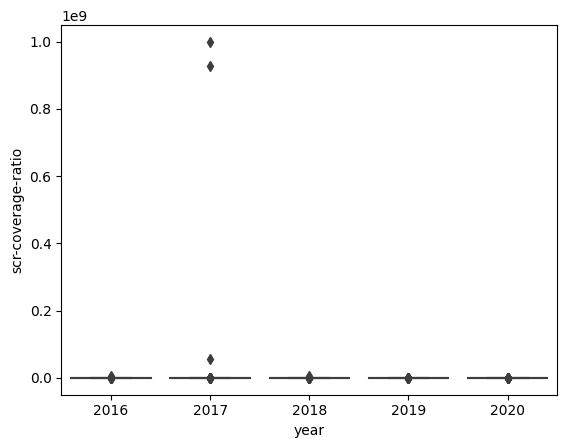

In [24]:
sns.boxplot(data = firm_data, x = 'year', y = 'scr-coverage-ratio')

In [25]:
# Identify scr_cov_ratio outliers - in this case defined as > 200
scr_cov_ratio_outliers = firm_data[firm_data['scr-coverage-ratio'] > 200]
scr_cov_ratio_outliers_list = list(scr_cov_ratio_outliers[['firm', 'year', 'scr-coverage-ratio']].values)

# Return a list of the outlier firms, year and the corresponding year and SCR coverage ratio value.
scr_cov_ratio_outliers_list

[array(['Firm 320', 2016, 6735557.777192473], dtype=object),
 array(['Firm 1', 2017, 55887003.05757315], dtype=object),
 array(['Firm 127', 2017, 225855.08200256294], dtype=object),
 array(['Firm 131', 2017, 926983361.3623732], dtype=object),
 array(['Firm 216', 2017, 999302877.1753808], dtype=object),
 array(['Firm 66', 2018, 7161991.975376571], dtype=object),
 array(['Firm 127', 2018, 168645.75193701516], dtype=object),
 array(['Firm 127', 2019, 84538.37127999381], dtype=object),
 array(['Firm 127', 2020, 89529.27796319264], dtype=object)]

To meet requirements, firms should have an SCR coverage ratio of 100. In 2020, 324 firms reported insuficient values. These firms are stored in insufficient_capital_list.

In [34]:
# Identify firms with an SCR-Coverage-Ratio <100 in 2020 and therefore not holding enough capital to meet requirements
firm_data_2020 = firm_data[firm_data["year"] == 2020]
insufficient_capital = firm_data_2020[firm_data_2020['scr-coverage-ratio'] < 100]
insufficient_capital_list = list(insufficient_capital[['firm', 'year', 'scr-coverage-ratio']].values)

len(insufficient_capital_list)

324